In [80]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
import numpy as np
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt

In [81]:
# reading data
data = pd.read_csv("winequality-red.csv")

In [82]:
# printing data
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [83]:
# printing null values and types of data since data has not got any object or string we don't need to evaluate types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [84]:
# printing statistical information about data
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## Data Visualization

<AxesSubplot:ylabel='quality'>

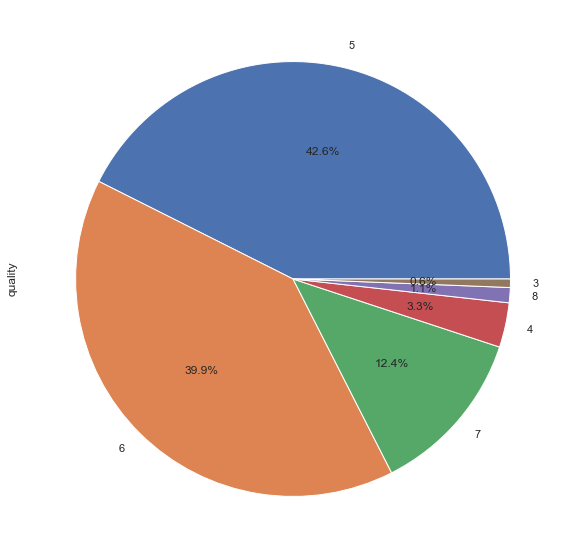

In [85]:
# This pie chart shows distribution of wine quality by quality classes
plt.figure(1, figsize=(10,10))
data['quality'].value_counts().plot.pie(autopct="%1.1f%%")

<AxesSubplot:xlabel='quality', ylabel='sulphates'>

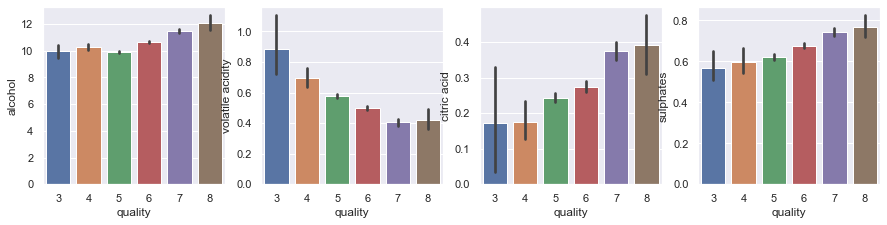

In [86]:
import seaborn as sns; sns.set()

plt.figure(figsize=(15, 15))

# this graph shows that the higher the alcohol, the higher the quality.
plt.subplot(4,4,1)
sns.barplot(x = 'quality', y = 'alcohol', data = data)

# this graph shows that quality decreases as volatile acidity decreases.
plt.subplot(4,4,2)
sns.barplot(x = 'quality', y = 'volatile acidity', data = data)

# this graph shows that the higher the citric acid, the higher the quality.
plt.subplot(4,4,3)
sns.barplot(x = 'quality', y = 'citric acid', data = data)

# this graph shows that the higher the sulphates, the higher the quality.
plt.subplot(4,4,4)
sns.barplot(x = 'quality', y = 'sulphates', data = data)

In [87]:
# this line shows us there is no NaN value in dataset.
data.isna().sum().sum()

0

In [88]:
# this line shows us quality column has 6 different quality type and how many value they have for each quality.
data.quality.value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [89]:
# We will assing new values to quality column. If quality is lower than 6 it will be low quality above that it will
# be high quality
data["quality"] = data.quality.apply(lambda q: 'low' if q < 6 else 'high')

In [90]:
# Since ML algorithms don't work on string values we have to encode them. In order to do that we will use label encoder.
label_quality = LabelEncoder()

In [91]:
# Applying encoder to our column it will transform high values to 0 low values to 1.
data['quality'] = label_quality.fit_transform(data['quality'])

In [92]:
# checking that transformation is done correctly or not. Our 0 column should have 638+199+18 values and it is okay.
data.quality.value_counts()

0    855
1    744
Name: quality, dtype: int64

In [93]:
# we will indicate feature and target columns. In this case quality column(y) will be our target 
# other columns are features(x)
x = data.drop("quality", axis=1)
y = data["quality"]

In [94]:
# splitting our database in order to avoid overfitting and testing it more accurately.
# we have used scikit-learns train_test_split method.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 43, shuffle=1)

In [95]:
# Defining standard scaler.
sc = StandardScaler()

In [96]:
# Apllying scaler to our x_train and x_test to obtain optimized results.
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [97]:
"""
Instead of writing same comments for each implementation. We will explain them in here.
1) We will create our model. We used scikit-learn's libraries for models.
2) We will fit our models by using x_train and y_train. Fitting basically means we will make our algorithm learn the
relationship between train and test data.
3) Our model will make predictions by taking our test samples(x_test)
4) Printing confusion matrix to check accuracy of our model. It will also show us wrong predictions as false true and 
false false
5) Printing accuracy score of our model.
6) Arranging parameters grid and implementing random search for Gradient Boosting and Random forest. We implemented
grid search for Support Vector Machines. We wanted to try both of them. More iteration could give us better results
since we don't have too much computation power we didn't obtain best parameters.
7) Taking best parameters of random search or grid search and retraining our model with best parameters. 
8) Taking predictions from retrained models.
9) Calculating accuray scores of new models. Except support vector machines all searches increased our accuracy 
around %1.
10) Applying cross validation and taking its mean. 
We used 3 classification algorithms which are support vector machines, gradient boosting and random forest 
in order to classify the wine quality.
In final random forest seems best algorithm with accuracy score %80. 
Gradient boosting seems second best algorithm with accuracy score %79
As last one support vector machine seems algorithm with less accuracy. It is around %76.
"""

"\nInstead of writing same comments for each implementation. We will explain them in here.\n1) We will create our model. We used scikit-learn's libraries for models.\n2) We will fit our models by using x_train and y_train. Fitting basically means we will make our algorithm learn the\nrelationship between train and test data.\n3) Our model will make predictions by taking our test samples(x_test)\n4) Printing confusion matrix to check accuracy of our model. It will also show us wrong predictions as false true and \nfalse false\n5) Printing accuracy score of our model.\nWe used 8 classification algorithms which are gaussian, bernoulli, decision tree, support vector machines,\nlogistic regression, K_Nearest Neighbors, gradient boosting and random forest  in order to classify the wine quality.\nAfter checking accuracy of each of them we will compare them.\n"

## Gradient Boosting

In [98]:
GBModel = GradientBoostingClassifier()
GBModel.fit(x_train, y_train)

GradientBoostingClassifier()

In [99]:
GBPredictions = GBModel.predict(x_test)

In [100]:
metrics.confusion_matrix(y_test, GBPredictions)

array([[143,  39],
       [ 30, 108]], dtype=int64)

In [101]:
metrics.accuracy_score(y_test, GBPredictions)

0.784375

In [102]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingRegressor

num_estimators = [250, 500]
learn_rates = [0.02, 0.08]
max_depths = [2, 5]
min_samples_leaf = [5, 10]
min_samples_split = [5, 10]

param_grid = {'n_estimators': num_estimators,
              'learning_rate': learn_rates,
              'max_depth': max_depths,
              'min_samples_leaf': min_samples_leaf,
              'min_samples_split': min_samples_split}

random_search =RandomizedSearchCV(GradientBoostingRegressor(loss='huber'), param_grid, random_state=1, n_iter=20, cv=5, verbose=0, n_jobs=-1)

random_search.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(loss='huber'),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'learning_rate': [0.02, 0.08],
                                        'max_depth': [2, 5],
                                        'min_samples_leaf': [5, 10],
                                        'min_samples_split': [5, 10],
                                        'n_estimators': [250, 500]},
                   random_state=1)

In [103]:
random_search.best_params_

{'n_estimators': 500,
 'min_samples_split': 5,
 'min_samples_leaf': 10,
 'max_depth': 5,
 'learning_rate': 0.02}

In [104]:
randomGBModel = GradientBoostingClassifier(n_estimators=250, learning_rate=0.02, max_depth=5, min_samples_split=10, min_samples_leaf=5)
randomGBModel.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=0.02, max_depth=5, min_samples_leaf=5,
                           min_samples_split=10, n_estimators=250)

In [105]:
newGBpredictions = randomGBModel.predict(x_test)

In [106]:
metrics.accuracy_score(y_test, newGBpredictions)

0.79375

In [107]:
GBcross = cross_val_score(estimator = randomGBModel, X = x_train, y = y_train, cv = 3)

In [108]:
GBcross.mean()

0.7755971163960081

## Support Vector Machines

In [109]:
SVModel = SVC()
SVModel.fit(x_train, y_train)

SVC()

In [110]:
SVPredictions = SVModel.predict(x_test)

In [111]:
metrics.confusion_matrix(y_test, SVPredictions)

array([[134,  48],
       [ 27, 111]], dtype=int64)

In [112]:
metrics.accuracy_score(y_test, SVPredictions)

0.765625

In [113]:
from sklearn.model_selection import GridSearchCV

param = {
    'C': [0.1,0.8,0.9,1,1.1,1.2,1.3,1.4],
    'kernel':['linear', 'rbf'],
    'gamma' :[0.1,0.8,0.9,1,1.1,1.2,1.3,1.4]
}
grid_svc = GridSearchCV(SVModel, param_grid=param, scoring='accuracy', cv=10)
grid_svc.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'gamma': [0.1, 0.8, 0.9, 1, 1.1, 1.2, 1.3, 1.4],
                         'kernel': ['linear', 'rbf']},
             scoring='accuracy')

In [114]:
grid_svc.best_params_

{'C': 1.1, 'gamma': 0.8, 'kernel': 'rbf'}

In [115]:
gridSVModel = SVC(C=1.1, gamma=0.8, kernel="rbf")
gridSVModel.fit(x_train, y_train)

SVC(C=1.1, gamma=0.8)

In [116]:
gridSVpredictions = gridSVModel.predict(x_test)

In [117]:
metrics.accuracy_score(y_test, gridSVpredictions)

0.7625

In [118]:
SVMcross = cross_val_score(estimator = gridSVModel, X = x_train, y = y_train, cv = 3)

In [119]:
SVMcross.mean()

0.7529255679798279

## Random Forest

In [120]:
RFModel = RandomForestClassifier()
RFModel.fit(x_train, y_train)

RandomForestClassifier()

In [121]:
RFPredictions = RFModel.predict(x_test)

In [122]:
metrics.confusion_matrix(y_test,RFPredictions)

array([[142,  40],
       [ 27, 111]], dtype=int64)

In [123]:
metrics.accuracy_score(y_test, RFPredictions)

0.790625

In [124]:
from sklearn.ensemble import RandomForestRegressor

num_estimators = [500, 5000]
max_depths = [10, 50]
min_samples_leaf = [1, 15]
min_samples_split = [2, 20]
max_features = ["auto", "sqrt", "log2"]

param_grid = {'n_estimators': num_estimators,
              'max_depth': max_depths,
              'min_samples_leaf': min_samples_leaf,
              'min_samples_split': min_samples_split,
             "max_features": max_features}

random_search = RandomizedSearchCV(RFModel, param_grid, random_state=1, n_iter=5, cv=3, verbose=0, n_jobs=-1)

random_search.fit(x_train, y_train)

RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=5,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 50],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 15],
                                        'min_samples_split': [2, 20],
                                        'n_estimators': [500, 5000]},
                   random_state=1)

In [125]:
random_search.best_params_

{'n_estimators': 5000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 50}

In [126]:
randomRFModel = RandomForestClassifier(n_estimators=5000, min_samples_split=2, min_samples_leaf=1, max_features="sqrt", max_depth=50)
randomRFModel.fit(x_train, y_train)

RandomForestClassifier(max_depth=50, max_features='sqrt', n_estimators=5000)

In [127]:
randomRFPredictions = randomRFModel.predict(x_test)

In [128]:
metrics.accuracy_score(y_test, randomRFPredictions)

0.80625

In [129]:
RFcross = cross_val_score(estimator = randomRFModel, X = x_train, y = y_train, cv = 10)

In [130]:
RFcross.mean()

0.8123585137795276